In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [58]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_lables) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [49]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### processing the data (images)

In [40]:
train_images = train_images / 255.0

test_images = test_images / 255.0

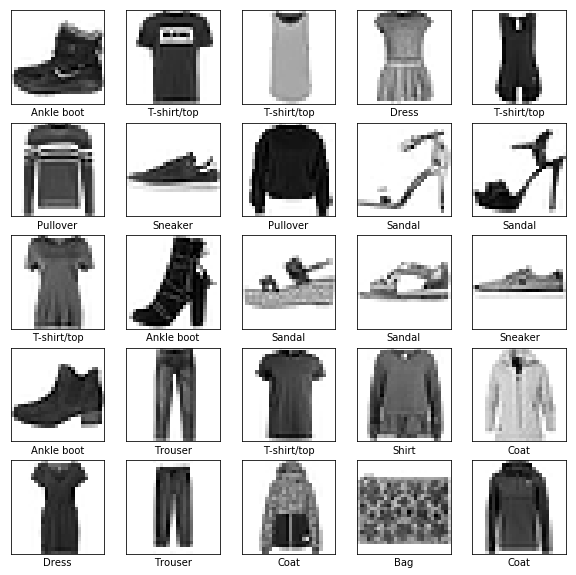

In [79]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

Building the model and set up layers in our Deep Neural Network

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(24,input_dim=train_images.shape, activation ='relu'),
    keras.layers.Dense(128, input_dim = 784, activation ='relu'),
    keras.layers.Dense(128,activation ='relu'),
    keras.layers.Dense(128,activation ='relu'),
    tf.keras.layers.Dense(10)
]) 
#model.add(Dense(24, input_dim = state_size, activation = 'relu'))

In [55]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### Train the model

In [56]:
model.fit(train_images, train_labels, epochs=20) 

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.9409 - accuracy: 0.6677
Epoch 2/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.6533 - accuracy: 0.7303
Epoch 3/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.6238 - accuracy: 0.7513
Epoch 4/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5472 - accuracy: 0.7929
Epoch 5/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5240 - accuracy: 0.7967
Epoch 6/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.5033 - accuracy: 0.8051
Epoch 7/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4823 - accuracy: 0.8115
Epoch 8/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4649 - accuracy: 0.8212
Epoch 9/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4581 - accuracy: 0.8232
Epoch 10/20
60

### Evaluate accuracy

In [60]:
test_loss, test_acc = model.evaluate(test_images,  test_lables, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest Loss:', test_loss)

10000/10000 - 0s - loss: 0.4892 - accuracy: 0.8196

Test accuracy: 0.8196

Test Loss: 0.4892041443824768


### Predction

In [61]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [62]:
predictions = probability_model.predict(test_images)

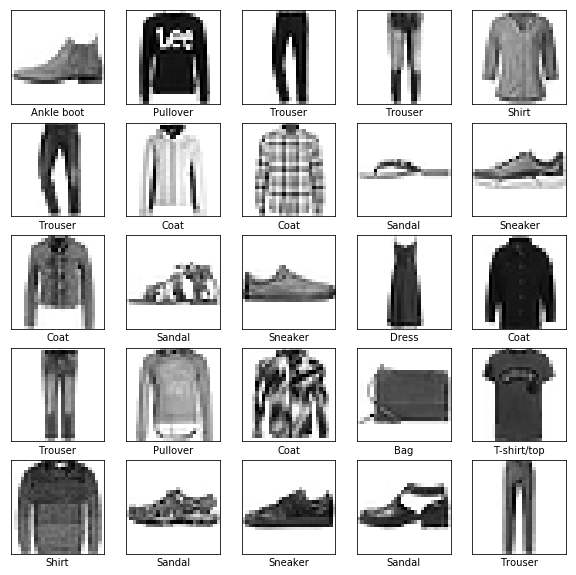

In [80]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()